<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">9.2.Deep_Learning-SRNN(Aumento_Datos)</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

## Seleccionar que tipo de ejecucion se va a realizar:

## AUTOMATICA o MANUAL (por defecto AUTOMATICA).

In [ ]:
# escribir entre parentesis AUTOMATICA o MANUAL

EJECUCION = "AUTOMATICA"

In [31]:
# en esta celda no ha de ser modificada 

if EJECUCION == "MANUAL":
    %run 3.Importaciones.ipynb

%run 4.VariablesClases.ipynb

In [32]:
datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_std_after_resampled = pd.read_csv('../datos/csv/datosEEG_std_after_resampled.csv', sep=',')
datosEEG_std_before_resampled = pd.read_csv('../datos/csv/datosEEG_std_before_resampled.csv', sep=',')
datosEEG_std_tres_segmentos = pd.read_csv('../datos/csv/datosEEG_std_tres_segmentos.csv', sep=',')

datosEEG_all = [datosEEG_std_after_resampled, datosEEG_std_before_resampled]

nombre_clases = valores_key(datosEEG_seg1_standarizado)

# LSTM (Long short-term memory)

In [33]:
model_srnn_rs = crear_modelo_LSTM(TIMESTEPS, FEATURES, NUM_CLASES)

C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


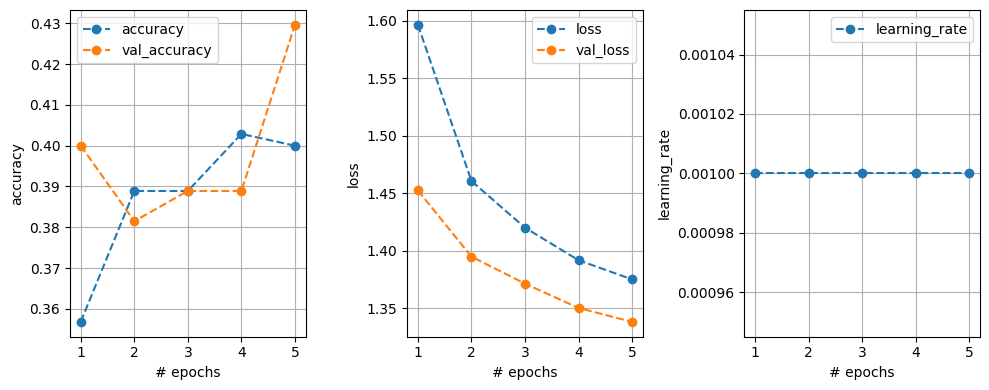

81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4011 - loss: 1.3722 - val_accuracy: 0.4296 - val_loss: 1.3381 - learning_rate: 0.0010
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [34]:
accuracy_score_srnn_rs = []
accuracy_score_test_srnn_rs =[]
matriz_confusion_srnn_rs = []
matriz_confusion_test_srnn_rs = []
total_simple_srnn_rs_trained = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
    
    X_train, X_val, X_test = reshapeo(X_train, X_val, X_test)
            
    # Entrenar el modelo
    model_srnn_trained_rs = model_srnn_rs.fit(X_train, y_train, epochs=EPOCHS, batch_size=BACH_SIZE, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint, plot_learning])
    
    y_pred = model_srnn_rs.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    y_pred_test = model_srnn_rs.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)

    accuracy_score_srnn_rs.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_srnn_rs.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_srnn_rs.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_srnn_rs.append(confusion_matrix(y_test, y_pred_classes_test))

    total_simple_srnn_rs_trained.append(model_srnn_trained_rs)


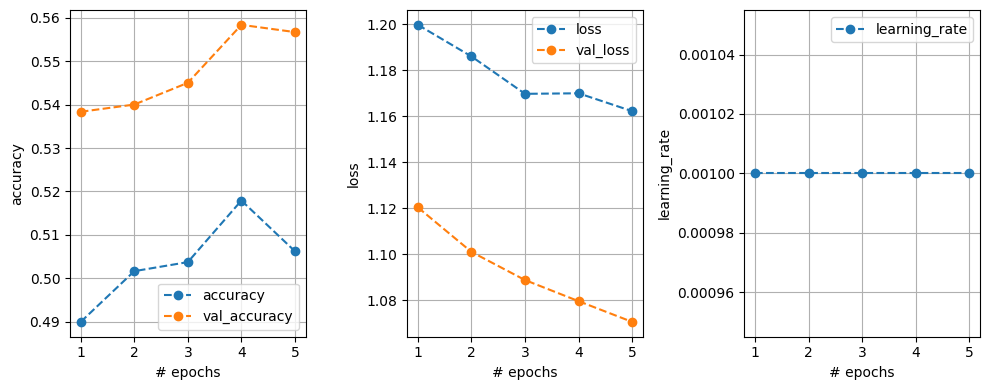

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5175 - loss: 1.1590 - val_accuracy: 0.5567 - val_loss: 1.0706 - learning_rate: 0.0010
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [35]:


X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos_deep_sr(datosEEG_std_tres_segmentos, datosEEG_seg1_standarizado, TARGET)

X_train, X_val, X_test = reshapeo(X_train, X_val, X_test)

# Entrenar el modelo
model_srnn_rs_trained1 = model_srnn_rs.fit(X_train, y_train, epochs=EPOCHS, batch_size=BACH_SIZE, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint, plot_learning])

y_pred = model_srnn_rs.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_test = model_srnn_rs.predict(X_test)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)

accuracy_score_srnn_rs.append(accuracy_score(y_val, y_pred_classes))
matriz_confusion_srnn_rs.append(confusion_matrix(y_val, y_pred_classes))

accuracy_score_test_srnn_rs.append(accuracy_score(y_test, y_pred_classes_test))
matriz_confusion_test_srnn_rs.append(confusion_matrix(y_test, y_pred_classes_test))

total_simple_srnn_rs_trained.append(model_srnn_rs_trained1)

,SRNN_RS_VAL
All Segmentos after,0.581481
All Segmentos before,0.400000
Test Datos Reales,0.538333


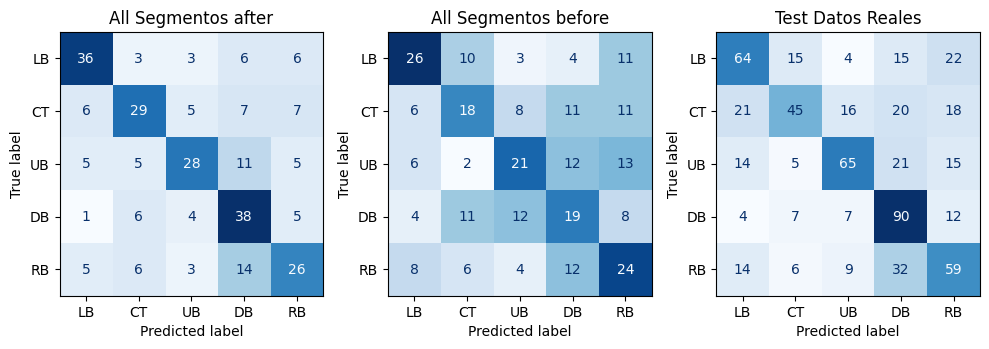

In [36]:

datos_srnn_rs = pd.DataFrame(accuracy_score_srnn_rs, columns=['SRNN_RS_VAL'], index=(titulos_all_rs))

display(datos_srnn_rs)

mc_srnn = []

for matrices_srnn in matriz_confusion_srnn_rs:

    mc_srnn.append(pd.DataFrame(matrices_srnn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(1, 3, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_srnn[0], mc_srnn[1], mc_srnn[2]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all_rs)):

    ax = axs[i]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

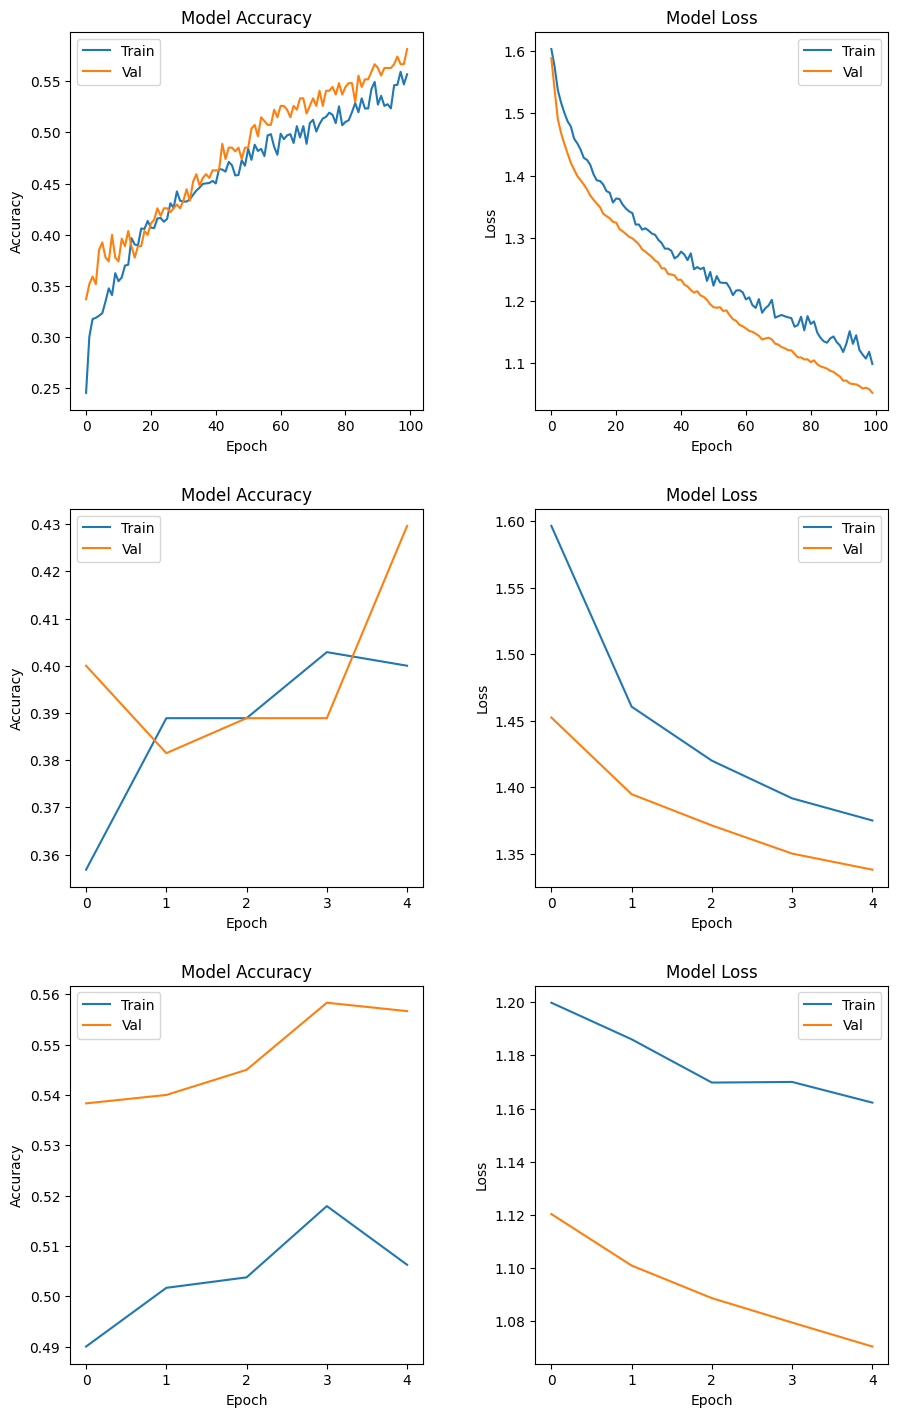

In [37]:
# Crear una figura con 6 subgráficos (3 filas y 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Asegurarse de que haya suficiente espacio entre los subgráficos
plt.tight_layout(pad=5.0)

# Alternar entre 'loss' y 'accuracy' para cada par de subgráficos
for idx, history in enumerate(total_simple_srnn_rs_trained[:4]):
    i, j = divmod(idx * 2, 2)
    # Imprimir la gráfica de pérdida en el primer subgráfico del par
    print_chart(axes[i, j], "Model Accuracy", "Epoch", "Accuracy", 
            [history.history['accuracy'], history.history['val_accuracy']], ['Train', 'Val'])
    
    # Imprimir la gráfica de precisión (accuracy) en el segundo subgráfico del par
    i, j = divmod(idx * 2 + 1, 2)
    print_chart(axes[i, j], "Model Loss", "Epoch", "Loss", 
                [history.history['loss'], history.history['val_loss']], ['Train', 'Val'])

# Mostrar todas las gráficas en una sola figura
plt.show()

,SRNN_RS_TEST
All Segmentos after,0.553333
All Segmentos before,0.356667
Test Datos Reales,0.592308


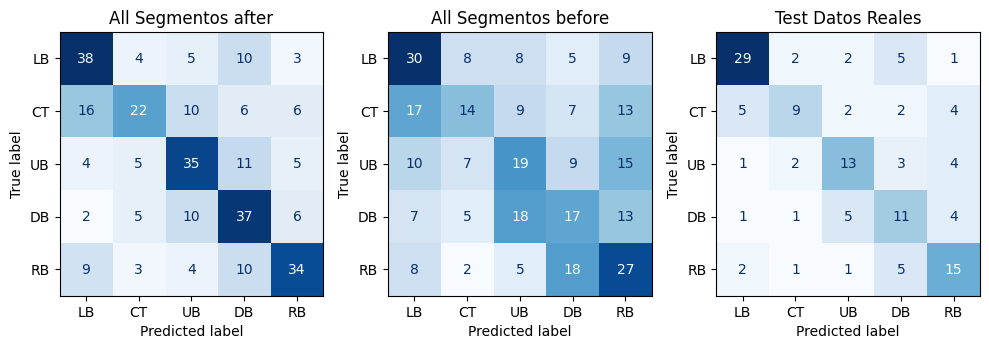

In [38]:
datos_srnn_rs_test = pd.DataFrame(accuracy_score_test_srnn_rs, columns=['SRNN_RS_TEST'], index=(titulos_all_rs))

display(datos_srnn_rs_test)

mc_srnn = []

for matrices_srnn in matriz_confusion_test_srnn_rs:

    mc_srnn.append(pd.DataFrame(matrices_srnn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(1, 3, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_srnn[0], mc_srnn[1], mc_srnn[2]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all_rs)):

    ax = axs[i]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

In [39]:
datos_srnn_rs_test.to_csv(f'../datos/csv/datosEGG_SRNN_RS_test.csv', index=False)
datos_srnn_rs.to_csv(f'../datos/csv/datosEGG_SRNN_RS_val.csv', index=False)